In [ ]:
# To download the Dataset with "wget", we use the following command.
# if the wget didin't work, you must install "WGET" in your OS

## 1) Importing Dataset and Libraries

In [ ]:
!wget https://raw.githubusercontent.com/HadiTajari/Sales-Prediction/master/advertising.csv

### 1- 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data processing
from sklearn.preprocessing import Normalizer, StandardScaler
# data splitting
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, KFold

#data evaluation
from sklearn.metrics import r2_score , mean_squared_error

# data modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


# set SEED
SEED = 123

In [2]:
!ls

Sales Prediction.ipynb
advertising.csv


In [3]:
df = pd.read_csv("advertising.csv") # Loading dataset as DataFram with Pandas

In [4]:
df.head()  # Looking top 5 row

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22100
1,44.5,39.3,45.1,10400
2,17.2,45.9,69.3,12000
3,151.5,41.3,58.5,16500
4,180.8,10.8,58.4,17900


In [5]:
df.info()  # A summary of the dataset and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [6]:
# Observaions: 
 # 1) All of features are numeric
 # 2) The target variable is a numerical continuous type 
 # 3) So we must Use Regression Models

In [7]:
df.describe() # describtion of numeric features

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15130.500000
std,85.854236,14.846809,21.778621,5283.892253
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,11000.000000
50%,149.750000,22.900000,25.750000,16000.000000
75%,218.825000,36.525000,45.100000,19050.000000
max,296.400000,49.600000,114.000000,27000.000000


### Visualization of Data

Text(0, 0.5, 'Mount of Sales')

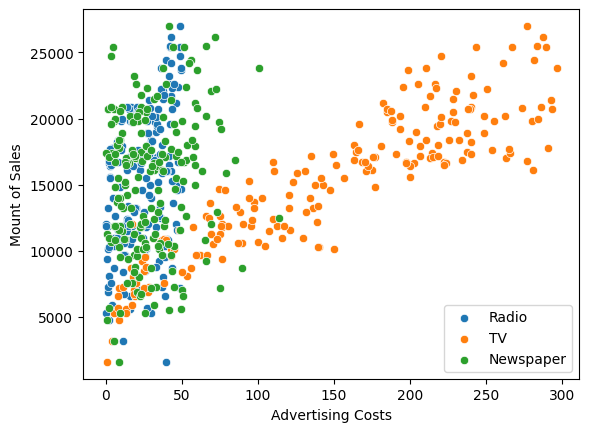

In [8]:
sns.scatterplot(x = "Radio", y="Sales", data=df)
sns.scatterplot(x = "TV", y="Sales", data=df)
sns.scatterplot(x = "Newspaper", y="Sales", data=df)
plt.legend(labels =["Radio", "TV", "Newspaper"])
plt.xlabel("Advertising Costs")
plt.ylabel("Mount of Sales")

### Spliting data to features and target variable

In [9]:
X = df.drop("Sales", axis=1) # The Features

In [10]:
y = df["Sales"] # The Target

### Splitting Data and making KFOLD

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2 , random_state=SEED ,shuffle= True)

In [12]:
# The shape of train and validation data
y_train.shape , y_val.shape

((160,), (40,))

In [13]:
kf = KFold( n_splits=5 , shuffle=True, random_state=SEED)

### Linear Regression

In [14]:
lin_reg = LinearRegression()
cv = cross_validate(lin_reg, X_train, y_train, cv = kf, scoring=("r2", "neg_mean_squared_error") ,return_estimator=True)
# detect more metrics https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
model_lin = cv["estimator"]

In [15]:
y_hats = [model.predict(X_val) for model in model_lin]
r2_lin  = np.mean([r2_score(y_val, y_hat) for y_hat in y_hats])
print("R2 of linearregression: " f'{r2_lin:0.2%}')

R2 of linearregression: 91.71%


### DecisionTree

In [16]:
dec = DecisionTreeRegressor()
cv = cross_validate(dec, X_train, y_train, cv = kf, scoring=("r2", "neg_mean_squared_error") ,return_estimator=True)
model_dec = cv["estimator"]

In [17]:
y_hats = [model.predict(X_val) for model in model_dec]
r2_dec = np.mean([r2_score(y_val, y_hat) for y_hat in y_hats])
print("R2 of DecisionTree: "f"{r2_dec:0.2%}")

R2 of DecisionTree: 91.42%


## RandomForest

In [18]:
rf = RandomForestRegressor()
cv = cross_validate(rf, X_train, y_train, cv = kf, scoring=("r2", "neg_mean_squared_error") ,return_estimator=True)
model_rf = cv["estimator"]

In [19]:
y_hats = [model.predict(X_val) for model in model_rf]
r2_rf = np.mean([r2_score(y_val, y_hat) for y_hat in y_hats])
print("R2 of Randomforest: "f"{r2_rf:0.2%}")

R2 of Randomforest: 96.97%


### Light Gradiant Boosting Model

In [20]:
lgb = LGBMRegressor()
cv = cross_validate(lgb, X_train, y_train, cv = kf, scoring=("r2", "neg_mean_squared_error") ,return_estimator=True)
model_lgb= cv["estimator"]

In [21]:
y_hats = [model.predict(X_val) for model in model_lgb]
r2_lgb = np.mean([r2_score(y_val, y_hat) for y_hat in y_hats])
print("R2 of LightGBM: "f"{r2_lgb:0.2%}")

R2 of LightGBM: 94.42%


### Extra Gradiant Boosting

In [22]:
xgb = XGBRegressor()
cv = cross_validate(xgb, X_train, y_train, cv = kf, scoring=("r2", "neg_mean_squared_error") ,return_estimator=True)
model_xgb= cv["estimator"]

In [23]:
y_hats = [model.predict(X_val) for model in model_xgb]
r2_xgb = np.mean([r2_score(y_val, y_hat) for y_hat in y_hats])
print("R2 of XGB: "f"{r2_xgb:0.2%}")

R2 of XGB: 95.82%


In [24]:
# Table of Results
print("R2 of linearregression: " f'{r2_lin:0.2%}')
print("R2 of DecisionTree: "f"{r2_dec:0.2%}")
print("R2 of Randomforest: "f"{r2_rf:0.2%}")
print("R2 of LightGBM: "f"{r2_lgb:0.2%}")
print("R2 of XGB: "f"{r2_xgb:0.2%}")

R2 of linearregression: 91.71%
R2 of DecisionTree: 91.42%
R2 of Randomforest: 96.97%
R2 of LightGBM: 94.42%
R2 of XGB: 95.82%
